In [1]:
import matplotlib
import matplotlib.pyplot as plt
import loompy
import numpy as np
import numpy_groupies as npg
from colors import colorize
from cytograph.visualization import scatterm
from sklearn.preprocessing import LabelEncoder

/home/peter/miniconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/peter/miniconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/peter/miniconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/peter/miniconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/home/peter/miniconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.

In [2]:
epithelial = 'HumanMeningesDev_Epithelial.loom'
fibroblasts = 'HumanMeningesDev_Fibroblasts.loom'
mouse_fibroblasts = 'Mouse_2020Pool_FibroblastVascular_Fibroblast.loom'

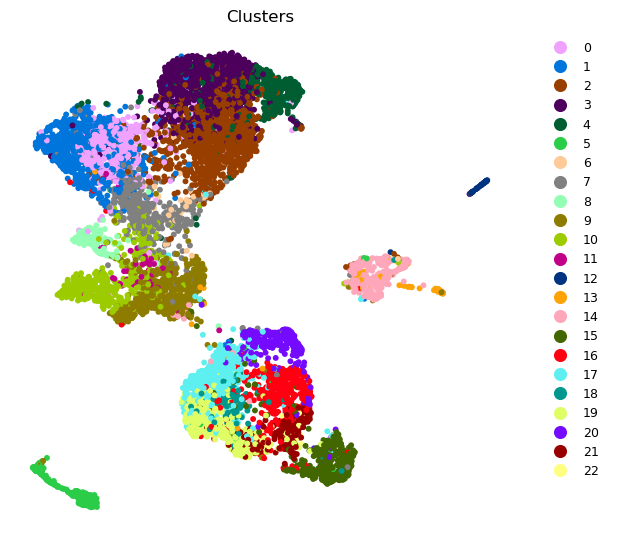

In [3]:
fig = plt.figure(None, (20, 5))
with loompy.connect(epithelial,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=18)
    ax.axis('off')
    plt.title("Clusters")
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.4,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

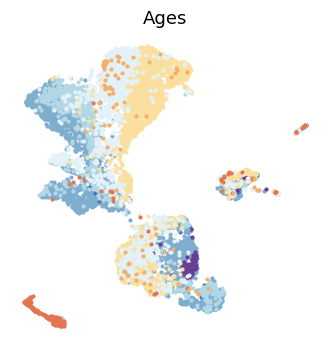

In [4]:
colors = ['#7EADCE','#4D74B2','#4D74B2','#683F97','#7EADCE','#B2D8E6','#FADF9E','#E3F2F9','#E3F2F9','#E17651','#F2B06C'] 
Age = ['7.5w','6.6w','6.7w','5.5w','7.6w','8.4w','10w','9w','9.9w','13.5w','12w']

plt.figure(None, (4,4))
with loompy.connect(epithelial, 'r') as ds:

    for i,a in enumerate(Age):
        exp = ds.ca.Agetext
        ix = (ds.ca.Agetext == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], alpha = 1, lw=0, s=9, rasterized=True) #, c=colors[i]
        plt.axis('off')
        plt.title('Ages',fontsize=13)

## CSF proteomics score

In [5]:
from neftel_states import NeftelStates

In [6]:
both_adult = ['A1BG','A2M','ACTB','ADGRB3','AGT','AHSG','AKAP11','ALB','ALDOA','AMBP','ANXA1','APLP1','APOA4','APOB','APOD','APOE','APOH','ATRN','AZGP1','B2M','BCAN','BTD','C1QB','C1QC',
              'C1R','C1RL','C1S','C2','C3','C4B','C5','C6','C7','C8A','C8B','C8G','C9','CA1','CADM2','CALM1','CALR','CD14','CD44','CD55','CDH11','CDH13','CDH2','CDH5','CFB','CFD',
              'CFH','CFI','CFL1','CHGA','CHGB','CHI3L1','CHL1','CLEC3B','CLU','CNDP1','CNTFR','CNTN1','CNTN4','COL18A1','COL6A1','COL6A3','COTL1','CP','CPB2','CPE','CPN1','CPQ','CREG1',
              'CRTAC1','CST3','CTBS','CTSD','CTSF','DAG1','DKK3','DSC3','ECM1','EFEMP1','EFNB2','ENO1','ENPP2','ESAM','F12','F13B','F2','F5','FAM160A2','FAM174A','FAM20C','FAT2','FBLN1',
              'FBN1','FCGBP','FGA','FN1','FSTL1','FTH1','GAPDH','GFRA2','GGH','GNPTG','GPX3','GSN','HABP2','HEG1','HGFAC','HP','HPX','HRG','HSP90B1','HSPA5','HSPA8','HSPG2','HYOU1',
              'ICOSLG','IGFBP2','IGFBP3','IGFBP4','IGFBP5','IGFBP6','IGFBP7','IGLON5','IL6ST','ITIH2','ITIH3','ITIH4','KLK6','KLKB1','KNG1','KRT10','LAMP2','LCAT','LDHB','LGALS1',
              'LGALS3BP','LSAMP','LTBP1','LTBP2','LUM','LYVE1','LYZ','MAN1A1','MASP1','MB','MEGF8','MYH15','MYOC','NCAM1','NCAM2','NEGR1','NELL2','NENF','NEO1','NRCAM','NRXN1','NTRK2',
              'NUCB1','OAF','OGN','OLFM1','OMG','OPCML','PAM','PCOLCE','PFN1','PGK1','PI16','PIK3IP1','PKM','PLG','PLTP','PLXDC2','PON1','PPIA','PPIB','PRAP1','PRDX2','PRDX6','PRELP',
              'PRNP','PROS1','PTGDS','PTPRG','PTPRM','PTPRZ1','PVR','QPCT','QSOX1','RARRES2','RBP4','RCN1','RGMA','RNASE1','RNASE4','RNASET2','S100A6','SCRG1','SELENOP','SERPINA1',
              'SERPINA5','SERPINB1','SERPINC1','SERPIND1','SERPINF1','SERPINF2','SERPING1','SERPINI1','SETX','SEZ6L','SEZ6L2','SH3BGRL','SHBG','SIRPA','SOD1','SPARC','SPARCL1','SPINT2',
              'SPTBN1','TBC1D2','TF','TGFBI','TGOLN2','THBS1','THY1','TIMP1','TIMP2','TMSB10','TMSB4X','TNFRSF21','TPI1','TTR','TXN','VASN','VCAM1','VTN','YWHAZ']

In [7]:
geneset1 = np.array(both_adult)
genesets = [ geneset1 ]
d = loompy.connect(epithelial, "r")
nf = NeftelStates(genesets)
scores = nf.fit(d) # (n_cells x n_genesets)

Loaded 33538 genes
Loaded expression matrix (33538 x 9705) and total UMIs
Normalizing to median total UMI
Calculating relative expression
Ordering genes by absolute expression
Computing signature scores


In [8]:
scores

array([[-4.90428593],
       [-2.41252826],
       [-4.5680991 ],
       ...,
       [-5.47900156],
       [-4.05577876],
       [-4.88377863]])

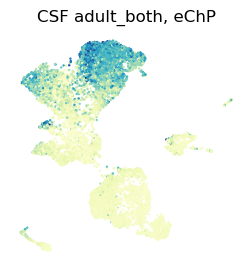

In [9]:
plt.figure(None, (3,3))
with loompy.connect(epithelial, 'r') as ds:
    
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c=scores, cmap='YlGnBu', s=3, lw=0) #, cmap='hot_r', rasterized=True
    plt.axis('off')
    plt.title('CSF adult_both, eChP', fontsize=12)
    plt.margins(0.05, 0.05)
    plt.show()

In [15]:
with loompy.connect(epithelial, 'r') as ds:
    labels = ds.ca.CellType
    print(labels)

['ChP Differentiated epithelia' 'ChP Differentiated epithelia'
 'ChP Differentiated epithelia' ... 'Midbrain hem progenitor'
 'Midbrain hem progenitor' 'Midbrain hem progenitor']


In [16]:
le = LabelEncoder().fit(labels)

In [17]:
label_ix = le.transform(labels)
label_ix

array([1, 1, 1, ..., 8, 8, 8])

In [18]:
le.inverse_transform(label_ix) #when you want to find the labels corresponding to the numbers again

array(['ChP Differentiated epithelia', 'ChP Differentiated epithelia',
       'ChP Differentiated epithelia', ..., 'Midbrain hem progenitor',
       'Midbrain hem progenitor', 'Midbrain hem progenitor'], dtype=object)

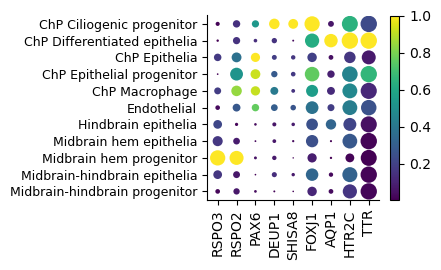

In [19]:
tick_labels = ['ChP Ciliogenic progenitor', 'ChP Differentiated epithelia',
 'ChP Epithelia', 'ChP Epithelial progenitor', 'ChP Macrophage',
 'Endothelial', 'Hindbrain epithelia', 'Midbrain hem epithelia',
 'Midbrain hem progenitor', 'Midbrain-hindbrain epithelia',
 'Midbrain-hindbrain progenitor']

with loompy.connect(epithelial, 'r') as ds:
    plt.figure(figsize = (4.2, 2.5), tight_layout = {'pad': 0})
    
    genes = ['RSPO3', 'RSPO2', 'PAX6', 'DEUP1', 'SHISA8', 'FOXJ1', 'AQP1', 'HTR2C','TTR']
    
    unique_clusters = np.unique(label_ix)
    n = len(unique_clusters)
    x = np.zeros((n, len(genes)))
    y = np.zeros((n, len(genes)))
    fnnz = np.zeros((n, len(genes)))
    means = np.zeros((n, len(genes)))
    
    for i, g in enumerate(genes):
        y[:, i] = np.arange(n)
        x[:, i] = np.array([i]*n)
        #print(label_ix)
        fnnz[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten() > 0, func='mean', fill_value=0)
        means[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten(), func='mean', fill_value=0)
        # normalize mean by max
        means[:, i] = means[:, i] / means[:, i].max()
    plt.scatter(x.flatten(), y.flatten(), s=fnnz.flatten()*140, c=means.flatten(), lw=0, rasterized=True)
    
    plt.yticks(np.arange(len(unique_clusters)), tick_labels, fontsize=9)
    plt.xticks(np.arange(len(genes)), genes, rotation='vertical')
    
    plt.margins(0.07, 0.05)
    plt.gca().invert_yaxis()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.colorbar()

In [20]:

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

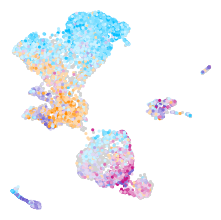

In [41]:
with loompy.connect(epithelial, 'r') as ds:
    genes = ["RSPO3", "RSPO2", "DEUP1","AQP1"]
    plt.figure(None, (2.6, 2.6))
    
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['mediumvioletred', 'slateblue', 'darkorange','deepskyblue'],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=5,
        max_percentile=99.7,
        legend=None
    )
    plt.margins(0.01, 0.01)
    plt.axis('off')

# PTPRC+ Fibroblasts

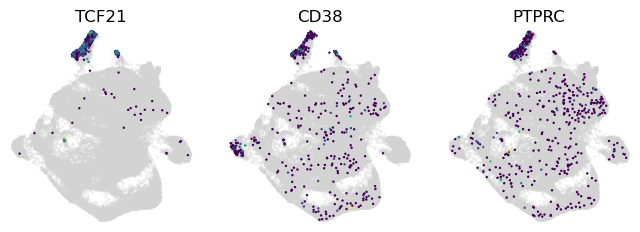

In [42]:
with loompy.connect(fibroblasts, 'r') as ds:
    plt.figure(None, (8, 2.5), facecolor='white')
    gs = plt.GridSpec(1, 3)

    to_plot = ['TCF21','CD38','PTPRC']

    for i, g in enumerate(to_plot):
        plt.subplot(gs[i])
        exp = np.log(ds[np.where(ds.ra.Gene == g)[0][0], :].flatten() + 1)
        exp_cells = exp > 0
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], color='lightgrey', alpha=0.3, s=3, lw=0, rasterized=True) 
        plt.scatter(ds.ca.UMAP[exp_cells, 0], ds.ca.UMAP[exp_cells, 1], c=exp[exp_cells], s=3, lw=0, rasterized=True) 
        plt.axis('off')
        plt.title(g, fontsize=12)
        plt.margins(0.01, 0.01)
        #plt.tight_layout
    plt.show()

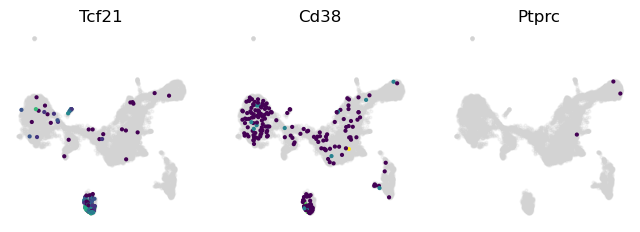

In [43]:
with loompy.connect(mouse_fibroblasts, 'r') as ds:
    plt.figure(None, (8, 2.5))
    gs = plt.GridSpec(1, 3)
    
    genes = ['Tcf21','Cd38','Ptprc']

    for i in range(len(genes)):
        plt.subplot(gs[i])
        exp = np.log(ds[ds.ra.Gene == genes[i], :].flatten() +1) 
        ix = exp > 0 
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', alpha=0.20, s=4)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', s=4)
        plt.axis('off')
        plt.title(genes[i], fontsize=12) 